<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_Finished/Computer_Vision_7_L1_Demonstration_1_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Demonstration of Computer Vision for Image Classification**

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and explore data


In [ ]:
# Load Google Drive where the dowloaded data is
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# %%time
# !rm -rf ./Datasets/

# !wget -q --directory-prefix='Datasets/' https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Datasets/mnist_test.csv
# !wget -q --directory-prefix='Datasets/' https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Datasets/mnist_train.csv

In [ ]:
%%time
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

CPU times: user 3.17 s, sys: 453 ms, total: 3.63 s
Wall time: 4.19 s


Neede to delete several duplciations to keep file under 100 MB limit for single to GitHub as drom Drive the data is above 100 MB

In [ ]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [ ]:
# Note that label column representng the actual number as an image
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Display an image



In [ ]:
# Obtain one image with list slicing
img = mnist_train[1:2]
img

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(img)

pandas.core.frame.DataFrame

In [ ]:
img = img.drop('label', axis=1)
img

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(img)

pandas.core.frame.DataFrame

In [ ]:
img = img.values
img.shape

(1, 784)

In [ ]:
img.shape

(1, 784)

In [ ]:
img = img.reshape(1, 28, 28)
img.shape

(1, 28, 28)

In [ ]:
img = img.squeeze()
img.shape

(28, 28)

In [ ]:
# Print the picture of 0 using nested loops
for line in img:
  for pixel in line:
    print(str(pixel).rjust(3, ' '), end='')
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

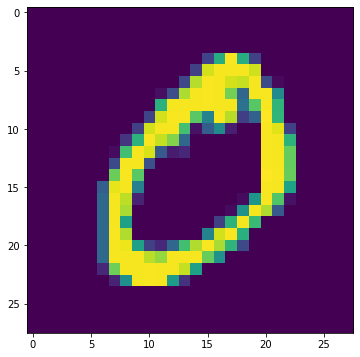

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(img);

In [ ]:
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing



In [ ]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

#### Identifying features and labels



In [ ]:
mnist_train_features = mnist_train.drop('label', axis = 1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis = 1)
mnist_test_target = mnist_test['label']

In [ ]:
mnist_train_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train_target.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [ ]:
mnist_test_target.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

#### Normalization


In [ ]:
print(f'train max - {mnist_train.values.max()}')
print(f'train min - {mnist_train.values.min()}')
print(f'test max - {mnist_test.values.max()}')
print(f'train min - {mnist_test.values.min()}')

train max - 255
train min - 0
test max - 255
train min - 0


In [ ]:
mnist_train = mnist_train.astype('float32')
mnist_train = mnist_train/255

In [ ]:
mnist_test = mnist_test.astype('float32')
mnist_test = mnist_test/255

In [ ]:
print(f'train max - {mnist_train.values.max()}')
print(f'train min - {mnist_train.values.min()}')
print(f'test max - {mnist_test.values.max()}')
print(f'train min - {mnist_test.values.min()}')

train max - 1.0
train min - 0.0
test max - 1.0
train min - 0.0


#### Converting to tensors

* Labels are in one column. Converting that one row but multiple columns (for loss func, target should be a 1D tensor; y vector should be of type long)


In [ ]:
import torch

In [ ]:
%%time
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype =torch.long)

CPU times: user 79.9 ms, sys: 114 ms, total: 194 ms
Wall time: 101 ms


In [ ]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [ ]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

### Defining DNN model and parameters



In [ ]:
import torch.nn as nn

In [ ]:
input_size = 784 # 28x28
output_size = 10 # 0 to 9

hidden1_size = 16
hidden2_size = 32

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden1_size)
    self.fc2 = nn.Linear(hidden1_size, hidden2_size)
    self.fc3 = nn.Linear(hidden2_size, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    x = self.fc3(x)
    return torch.log_softmax(x, dim=-1) # multiclass classification problem, hence softmax or log_softmax()

In [ ]:
model = Net()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
loss_fn = nn.NLLLoss() # since log_softmax is out output activation, we use NLLLoss

### Training



In [ ]:
%%time
import time
epochs = 100

for epoch in range(1, epochs + 1):
  start = time.time() # measuring how long it took, start time
  optimizer.zero_grad()
  Y_pred = model(X_train_tensor)
  loss = loss_fn(Y_pred , Y_train_tensor)
  loss.backward() # perform backpropogation
  optimizer.step() # update the model params
  end = time.time() # measuring how long it took, end time
  if epoch % 10 == 0:
    print('Epoch - %d, loss - %0.2f, this epoch took - %f(s) to proc' %(epoch, loss.item(), end - start))

Epoch - 10, loss - 2.14, this epoch took - 0.001616(s) to proc
Epoch - 20, loss - 2.10, this epoch took - 0.001572(s) to proc
Epoch - 30, loss - 2.06, this epoch took - 0.001519(s) to proc
Epoch - 40, loss - 2.01, this epoch took - 0.001631(s) to proc
Epoch - 50, loss - 1.96, this epoch took - 0.001603(s) to proc
Epoch - 60, loss - 1.91, this epoch took - 0.001662(s) to proc
Epoch - 70, loss - 1.85, this epoch took - 0.001720(s) to proc
Epoch - 80, loss - 1.79, this epoch took - 0.001920(s) to proc
Epoch - 90, loss - 1.74, this epoch took - 0.001619(s) to proc
Epoch - 100, loss - 1.69, this epoch took - 0.001471(s) to proc
CPU times: user 585 ms, sys: 3.83 ms, total: 588 ms
Wall time: 584 ms


In [ ]:
# CPU : ~19:50, 2020.09.03
# Epoch - 10, loss - 2.27, this epoch took - 0.324937(s) to proc
# Epoch - 20, loss - 2.22, this epoch took - 0.331396(s) to proc
# Epoch - 30, loss - 2.19, this epoch took - 0.329973(s) to proc
# Epoch - 40, loss - 2.16, this epoch took - 0.329068(s) to proc
# Epoch - 50, loss - 2.12, this epoch took - 0.333194(s) to proc
# Epoch - 60, loss - 2.09, this epoch took - 0.327277(s) to proc
# Epoch - 70, loss - 2.05, this epoch took - 0.331558(s) to proc
# Epoch - 80, loss - 2.01, this epoch took - 0.324825(s) to proc
# Epoch - 90, loss - 1.96, this epoch took - 0.326193(s) to proc
# Epoch - 100, loss - 1.91, this epoch took - 0.326266(s) to proc
# CPU times: user 32.9 s, sys: 32.6 ms, total: 32.9 s
# Wall time: 33.1 s

In [ ]:
# GPU : ~19:50, 2020.09.03
# Epoch - 10, loss - 2.25, this epoch took - 0.001521(s) to proc
# Epoch - 20, loss - 2.21, this epoch took - 0.001657(s) to proc
# Epoch - 30, loss - 2.18, this epoch took - 0.001661(s) to proc
# Epoch - 40, loss - 2.14, this epoch took - 0.001562(s) to proc
# Epoch - 50, loss - 2.10, this epoch took - 0.001648(s) to proc
# Epoch - 60, loss - 2.06, this epoch took - 0.001579(s) to proc
# Epoch - 70, loss - 2.02, this epoch took - 0.001576(s) to proc
# Epoch - 80, loss - 1.97, this epoch took - 0.001569(s) to proc
# Epoch - 90, loss - 1.91, this epoch took - 0.005088(s) to proc
# Epoch - 100, loss - 1.86, this epoch took - 0.001570(s) to proc
# CPU times: user 376 ms, sys: 185 ms, total: 561 ms
# Wall time: 688 ms

In [ ]:
# TPU : ~19:50, 2020.09.03
# Epoch - 10, loss - 2.24, this epoch took - 0.330422(s) to proc
# Epoch - 20, loss - 2.19, this epoch took - 0.333272(s) to proc
# Epoch - 30, loss - 2.16, this epoch took - 0.329385(s) to proc
# Epoch - 40, loss - 2.12, this epoch took - 0.339260(s) to proc
# Epoch - 50, loss - 2.09, this epoch took - 0.334132(s) to proc
# Epoch - 60, loss - 2.04, this epoch took - 0.332093(s) to proc
# Epoch - 70, loss - 2.00, this epoch took - 0.339295(s) to proc
# Epoch - 80, loss - 1.95, this epoch took - 0.340593(s) to proc
# Epoch - 90, loss - 1.89, this epoch took - 0.332068(s) to proc
# Epoch - 100, loss - 1.84, this epoch took - 0.346406(s) to proc
# CPU times: user 33.5 s, sys: 39.1 ms, total: 33.6 s
# Wall time: 33.7 s

### Model Evaluation

* Model.eval tells the network that it is in testing/evaluation phase. Dropout and batch normalisation, in particular, behave differently during testing and training and this will tell it which behaviour to adopt for the following run.



In [ ]:
model.eval() # turns off drop-out and regulraization in the NN

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)



We will use accuracy, precision and recall 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
with torch.no_grad():
  correct = 0 
  total = 0
  outputs = model(x_test_tensor)
  _, predicted = torch.max(outputs.data, 1)

  y_test = y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print(type(predicted))
  print('Accuracy: ', accuracy_score(predicted, y_test))
  print('Precision: ', precision_score(predicted, y_test, average='weighted'))
  print('Recall: ', recall_score(predicted, y_test, average='weighted'))

<class 'torch.Tensor'>
Accuracy:  0.688
Precision:  0.8253467698053449
Recall:  0.688


### Using model for predictions 



In [ ]:
print('sample target data = ', mnist_test_target.values[1005])

sample target data =  9


In [ ]:
sample_img = mnist_test_features.values[1005]
print(sample_img.shape)
sample_img = sample_img.reshape(1, 28, 28)
sample_img = sample_img[0, :, :]
sample_img.shape

(784,)


(28, 28)

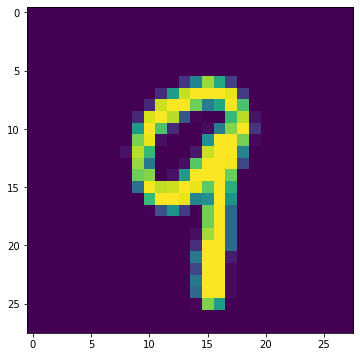

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(sample_img);

In [ ]:
sample_img.shape

(28, 28)

In [ ]:
sample = np.array(mnist_test_features.values[1005])
sample_tensor  = torch.from_numpy(sample).float()
sample_tensor

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [ ]:
sample_tensor.size()

torch.Size([784])

In [ ]:
y_pred = model(sample_tensor.to(device))
y_pred # get all the predictions of our multiclass

tensor([-3.5508, -2.1670, -3.3457, -2.6449, -1.6739, -2.9314, -2.7690, -1.6822,
        -2.6753, -1.6496], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [ ]:
# tensor(
#     [-6.0073, # probability that this is 0
#      -7.4843, # probability that this is 1
#      -7.8906, # probability that this is 2
#      -9.7474,
#      -3.2597,
#      -7.3738,
#      -5.3652,
#      -3.9881,
#      -4.9651,
#      -0.0754] # probability that this is 9 --> BIGGEST NUMBER
#      , device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [ ]:
_, predicted = torch.max(y_pred.data, -1) # the max of the prediction will give us the final answer

In [ ]:
print(f'The predicted label is : {predicted.item()}')

The predicted label is : 9



... code to evaluate the model in one place

Sample target data = 4
The predicted label is : 4


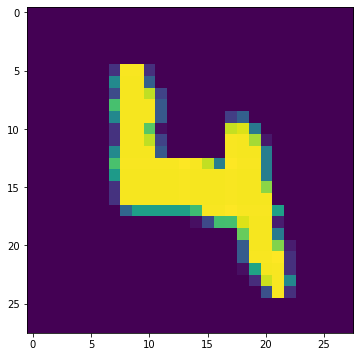

In [ ]:
idx_item_to_predict = 776

print(f'Sample target data = {mnist_test_target.values[idx_item_to_predict]}')

sample_img = mnist_test_features.values[idx_item_to_predict]
sample_img = sample_img.reshape(1, 28, 28)
sample_img = sample_img[0,:,:]
plt.figure(figsize =(6, 6))
plt.imshow(sample_img)

sample = np.array(mnist_test_features.values[idx_item_to_predict])
sample_tensor  = torch.from_numpy(sample).float()
y_pred = model(sample_tensor.to(device))
_, predicted = torch.max(y_pred.data, -1)
print(f'The predicted label is : {predicted.item()}')


### Testing the model against our own custom image


#### Draw a number

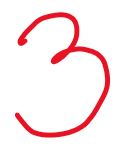

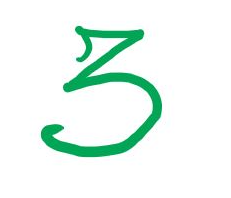



#### Upload the drawing as a picture

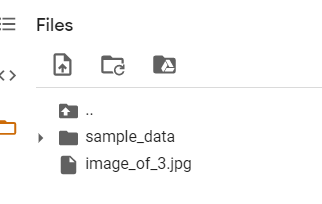


#### Preprocess it

In [ ]:
# # load Google Drive where the downloaded data is
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
# cd drive/MyDrive/Colab Notebooks

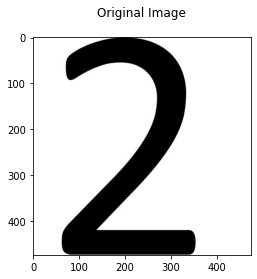

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.transform
import skimage.io
from skimage import data

image_name = '2.jpg'

image = mpimg.imread(image_name)
plt.title('Original Image\n')
plt.imshow(image);

In [ ]:
image.shape

(474, 474, 3)

- for jpg images: (474, 474, 3)
- for png images: (474, 474, 4) - alpha chanell causes that as it stands for opacity

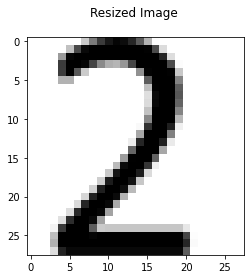

In [ ]:
# How to resize a custom image
from PIL import Image
original_image = Image.open(image_name)
resized_image = original_image.resize((28, 28))

plt.title('Resized Image \n')
plt.imshow(resized_image);

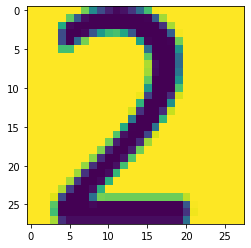

In [ ]:
gray_image = skimage.color.rgb2gray(np.asarray(resized_image))
plt.imshow(gray_image); #  cmap='gray'

In [ ]:
gray_image.shape

(28, 28)

In [ ]:
flattened = gray_image.flatten()
print(flattened.shape)

(784,)




#### Use the trained model for classifying which diggit was there

In [ ]:
import torch
import numpy as np

image_tensor = torch.from_numpy(flattened).float()
image_tensor.size()

torch.Size([784])

In [ ]:
y_pred = model(image_tensor.to(device))
y_pred

tensor([-2.0592, -2.7122, -2.0074, -1.9219, -2.9486, -1.9784, -2.1811, -3.1035,
        -2.1632, -2.7820], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [ ]:
_, predicted = torch.max(y_pred.data, -1) # the ma of the predition will be the final answer
print(f'The predicted label is : {predicted.item()}')

The predicted label is : 3



#### Invert image colors

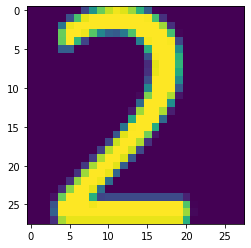

In [ ]:
import PIL.ImageOps
from PIL import Image
original_image = Image.open(image_name)
resized_image = original_image.resize((28, 28))

# Ivert the colors of the image to make it more simialr to image that network saw
inverted_image = PIL.ImageOps.invert(resized_image)
gray_image = skimage.color.rgb2gray(np.asarray(inverted_image))
plt.imshow(gray_image);

In [ ]:
flattened = gray_image.flatten()
image_tensor = torch.from_numpy(flattened).float()
y_pred = model(image_tensor.to(device))
y_pred

tensor([-2.4489, -2.2387, -2.4381, -2.2132, -2.3353, -2.5787, -2.1053, -2.0910,
        -2.4588, -2.2370], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [ ]:
_, predicted = torch.max(y_pred.data, -1) # the max of the predcition will be the final answer
print(f'Tne predicted label is : {predicted.item()}')

Tne predicted label is : 7


# **PART END OF DEMONSTRATION ON COMPUTER VISION** 

# Keras implementation


# Detecting Corners and Edges w/ Convolution

Photo: https://www.pexels.com/photo/city-road-street-italy-5166/


## Import libraries


## Read image

In [ ]:
# %%time
# !rm -rf ./Public/Photo/
# !wget -q --directory-prefix='Public/Photo/' https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Public/Photo/street.jpg


## Convert to tensor
* Resize the image and convert to pytorch tensor by applying the transforms

## Getting the image back from a tensor

Note:
- Before we used 4D tensor, that was representing an image set.
- Now we use a single image.
- So the transposition we need to happen from dimension 0, to 2, not 0-3




## What happens to the additional pixel

When we first called tf.Resize() we specified only one dimension and the dimensionality of resulting image was (400 x 599), when wen we specified the precise dimensions we were able to achieve (400 x 600) and that pixel defines opacity.



## Defining filter


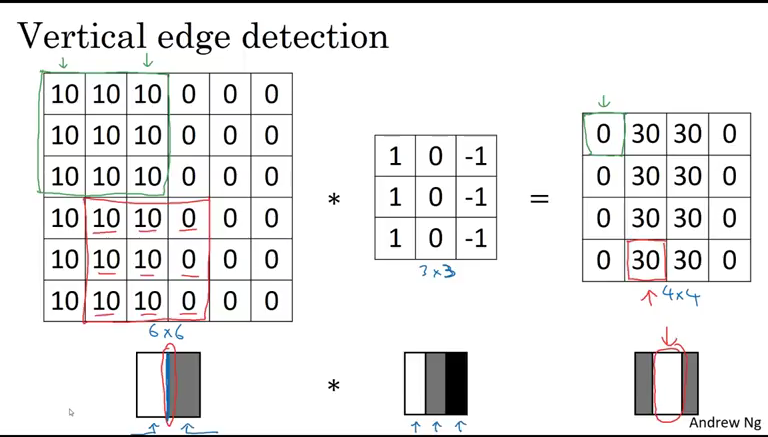


... and what does it mean to sharpen the image? The oposite of bluring!

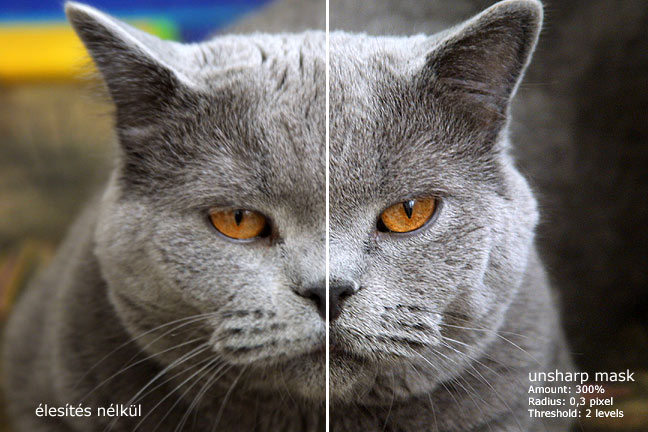



## Gaining intuition of filters
- You can play around with different filters here: https://setosa.io/ev/image-kernels/
- The significance of sharpening in medical diagnostics: https://pubmed.ncbi.nlm.nih.gov/30166247/

- We will ouput a single chanell feature map, so 1-st dimesions is 1

## Applying filter


## Displaying result image


## Pooling

The default stride of the pooling layer is the size of the pooling layer, so in this case it is 2

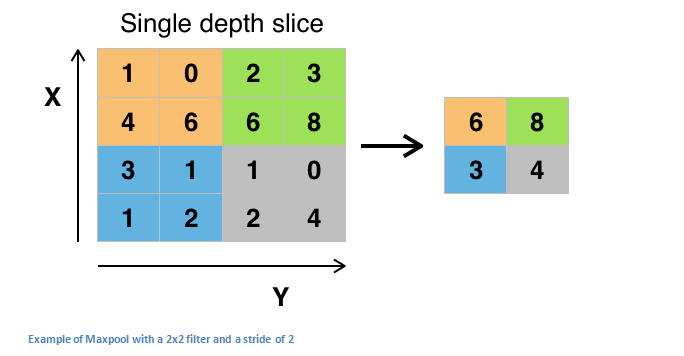

# DONE